#**Расчетное задание №3**

##Степанищев Степан, гр. 23171

Подключаем необходимые библиотеки

---



In [52]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Вводим данные, соответствующие V=6

---



In [53]:
V = 6
N = 10

attr_1 = [40+V, 100-V, 30+V, 25+V, V, 100+V, 230-V, 110+V, 120+V, 180-V]
attr_2 = [10+V, 110-V, 20+V, 15+V, 105-V, 120+V, 220-V, 90+V, 200-V, 160-V]
target = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
d = {'X1': attr_1, 'X2': attr_2, 'target': target}
full_df = pd.DataFrame(data=d)

Y=full_df['target']
X=full_df.drop(columns=['target'])

Вычисляем мат. ожидания по обоим признакам

---



In [54]:
mu_1 = X[0:6]['X1'].mean()
mu_2 = X[0:6]['X2'].mean()
mu = [mu_1,mu_2]

nu_1 = X[6:]['X1'].mean()
nu_2 = X[6:]['X2'].mean()
nu = [nu_1,nu_2]

Вычисляем дисперсию по формуле из шпаргалки

---



In [55]:
X=X.values.T
dispersion = 1/20 * sum(
    [sum([(X[j][i] - mu[j])**2 for i in range(6)]) +
    sum([(X[j][i] - nu[j])**2 for i in range(6,10)])
    for j in range(2)])

Теперь мы сможем легко найти уравнение прямой (а у нас разделяющая функция задает именно прямую, в силу равенства дисперсий) с к-ми *a* и *b*

---



In [56]:
P1 = 6/N
P2 = 4/N

a = (mu[0] - nu[0]) / (nu[1] - mu[1])
b = ((nu[0]**2 + nu[1]**2 - mu[0]**2 - mu[1]**2) / (2*(nu[1]-mu[1]))) - (dispersion / (nu[1] - mu[1])) * math.log((P2/P1))


Остается только изобразить решение

---



In [57]:
def f(x):
  return a * x + b

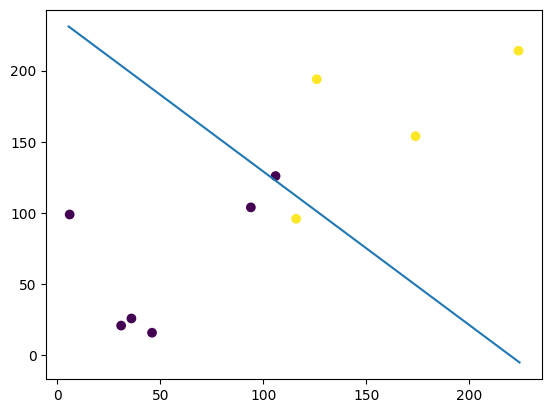

In [59]:
grid = np.linspace(X[0].min() - 0.5, X[0].max() + 0.5, 1000)
plt.scatter(X[0], X[1], c=Y)

curve = f(grid)
plt.plot(grid, curve)


**Вывод:** Получили точность 80%, что в принципе не сильно плохо.